In [12]:
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import skimage
from tensorflow.keras import Input

(780, 1280, 3)


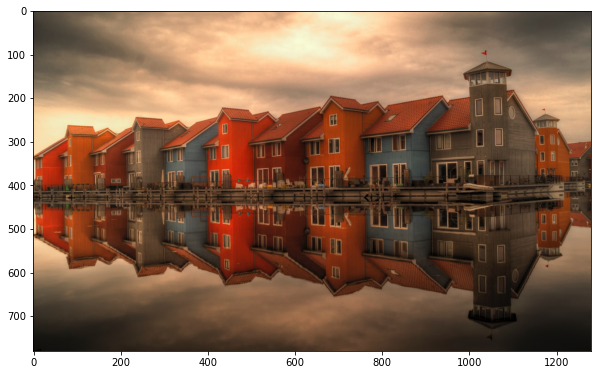

In [2]:
figures = skimage.io.imread('data/images/buildings-cloudy-colorful.jpg')
plt.figure(figsize=(10, 10))
plt.imshow(figures)
print(figures.shape)

(780, 1280)


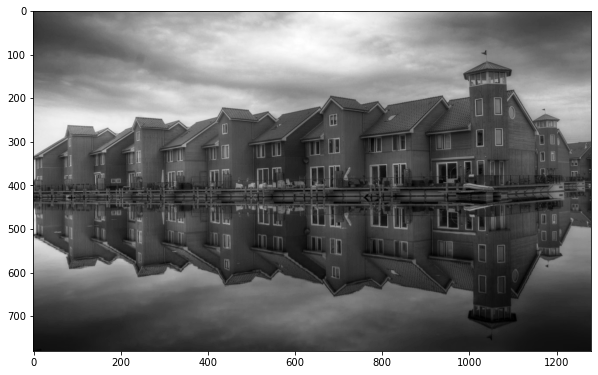

In [3]:
image = skimage.color.rgb2gray(figures)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
print(image.shape)


In [33]:
def apply_convolution(image, kernel):
    image_4d = image[np.newaxis, :, :, np.newaxis] # add batch dimension and channel dimension
    image_tensor = tf.constant(image_4d, dtype=tf.float32)
    conv_w = tf.constant(kernel, dtype=tf.float32, shape=(3, 3, 1, 1))
    result = tf.nn.conv2d(image_tensor, conv_w, strides=[1, 1, 1, 1], padding='SAME')

    return result

In [34]:
def display_original_convolutionresult(image, result):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10),
                                sharex=True, sharey=True)
    ax = axes.ravel()
    ax[0].imshow(image, cmap='gray')
    ax[1].imshow(result[0, :, :, 0], cmap='gray')
    plt.tight_layout()
    plt.show();

In [35]:
kernel_gaussianblur = [
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]
]

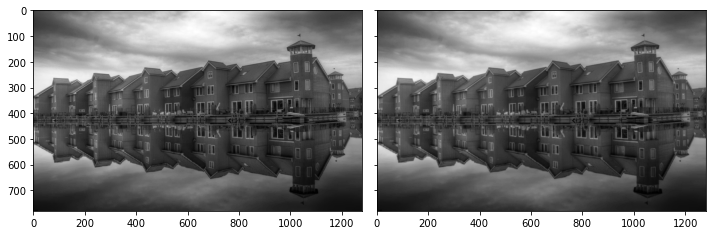

In [36]:
result = apply_convolution(image, kernel_gaussianblur)
display_original_convolutionresult(image, result)

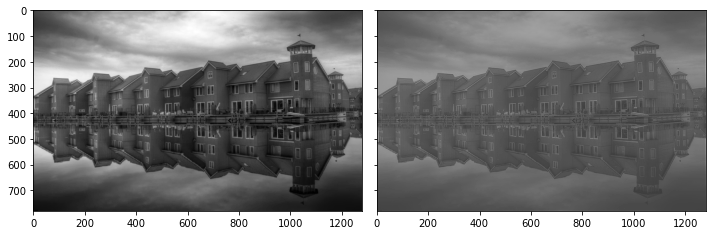

In [37]:
kernel_sharpen = [
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]]

result = apply_convolution(image, kernel_sharpen)
display_original_convolutionresult(image, result)

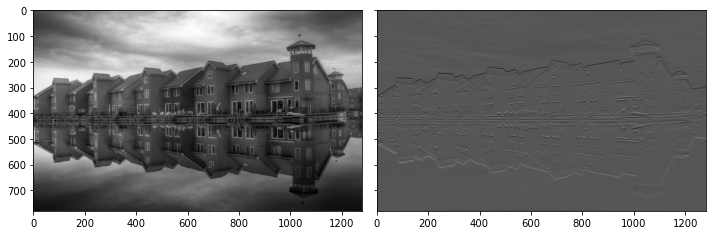

In [38]:
kernel_horizontal = [
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]]

result = apply_convolution(image, kernel_horizontal)
display_original_convolutionresult(image, result)

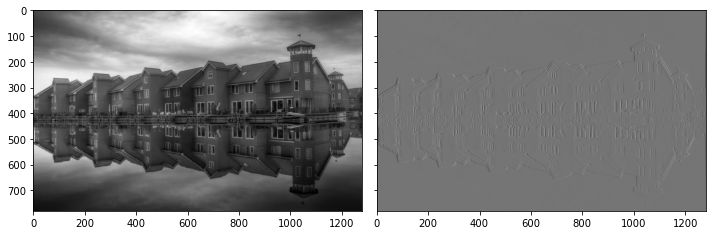

In [39]:
kernel_vertical = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]]

result = apply_convolution(image, kernel_vertical)
display_original_convolutionresult(image, result)

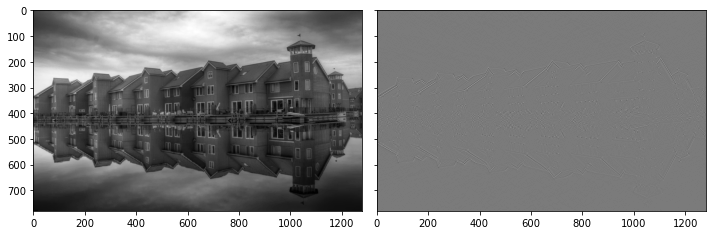

In [40]:
kernel_45 = [
    [-1, -1, 2],
    [-1, 2, -1],
    [2, -1, -1]]
result = apply_convolution(image, kernel_45)
display_original_convolutionresult(image, result)